# Cargar librerias

In [ ]:
pip install --upgrade 'google-cloud-bigquery[bqstorage,pandas]'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Obtener datos de BigQuery - Analizar solo el jueves pdThursday

In [ ]:
#The next step takes 11 minutes to get all the data

In [ ]:
from google.oauth2 import service_account #For credentials
from google.cloud import bigquery

##Mount access to Drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

#Set credentials as global
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="drive/MyDrive/Ideas/movilidad/vacio-276411-service_account_for_colab.json"

##Get credentials
key_path = 'drive/MyDrive/Ideas/movilidad/vacio-276411-service_account_for_colab.json'
credentials = service_account.Credentials.from_service_account_file(
    key_path, scopes=["https://www.googleapis.com/auth/cloud-platform"],
)
bqclient = bigquery.Client(credentials=credentials, project=credentials.project_id,)

# Download query results.
query_string = """
SELECT
CONCAT(
    'https://stackoverflow.com/questions/',
    CAST(id as STRING)) as url,
view_count
FROM `bigquery-public-data.stackoverflow.posts_questions`
WHERE tags like '%google-bigquery%'
ORDER BY view_count DESC
"""

query_string = """ SELECT * FROM `vacio-276411.mainDataset.V_data_cluster` """

dataframe = (
    bqclient.query(query_string)
    .result()
    .to_dataframe()
)
print(dataframe.head())

Mounted at /content/drive
   servicio tipoVehiculo    year  month   day    weekday  hour  clusterId  \
0  ecooltra         None  2021.0    4.0   4.0     Sunday  17.0        5.0   
1  ecooltra         moto  2022.0    1.0  29.0   Saturday  22.0       16.0   
2   acciona         moto  2021.0   12.0  16.0   Thursday  22.0        5.0   
3     wible        coche  2021.0   12.0  16.0   Thursday  22.0       81.0   
4    car2go        coche  2021.0    9.0   8.0  Wednesday  12.0        5.0   

  clusterLatitude clusterLongitude  numAvailable  numTrips  
0          40.382           -3.696             1       NaN  
1          40.392           -3.666             3       NaN  
2          40.382           -3.696             3       NaN  
3          40.482           -3.736             2       NaN  
4          40.382           -3.696             1       1.0  


In [ ]:
dataframe.head()

,servicio,tipoVehiculo,year,month,day,weekday,hour,clusterId,clusterLatitude,clusterLongitude,numAvailable,numTrips
0,ecooltra,None,2021.0,4.0,4.0,Sunday,17.0,5.0,40.382,-3.696,1,NaN
1,ecooltra,moto,2022.0,1.0,29.0,Saturday,22.0,16.0,40.392,-3.666,3,NaN
2,acciona,moto,2021.0,12.0,16.0,Thursday,22.0,5.0,40.382,-3.696,3,NaN
3,wible,coche,2021.0,12.0,16.0,Thursday,22.0,81.0,40.482,-3.736,2,NaN
4,car2go,coche,2021.0,9.0,8.0,Wednesday,12.0,5.0,40.382,-3.696,1,1.0


In [ ]:
dataframe.groupby('numTrips').count()

,servicio,tipoVehiculo,year,month,day,weekday,hour,clusterId,clusterLatitude,clusterLongitude,numAvailable
numTrips,,,,,,,,,,,
1.0,3038545,3038545,3038545,3038545,3038545,3038545,3038545,3038545,3038545,3038545,3038545
2.0,162226,162226,162226,162226,162226,162226,162226,162226,162226,162226,162226
3.0,18357,18357,18357,18357,18357,18357,18357,18357,18357,18357,18357
4.0,3135,3135,3135,3135,3135,3135,3135,3135,3135,3135,3135
5.0,931,931,931,931,931,931,931,931,931,931,931
6.0,463,463,463,463,463,463,463,463,463,463,463
7.0,158,158,158,158,158,158,158,158,158,158,158
8.0,56,56,56,56,56,56,56,56,56,56,56
9.0,24,24,24,24,24,24,24,24,24,24,24


In [ ]:
pdThursday = dataframe[dataframe.weekday == 'Thursday']
pdThursday

,servicio,tipoVehiculo,year,month,day,weekday,hour,clusterId,clusterLatitude,clusterLongitude,numAvailable,numTrips
2,acciona,moto,2021.0,12.0,16.0,Thursday,22.0,5.0,40.382,-3.696,3,NaN
3,wible,coche,2021.0,12.0,16.0,Thursday,22.0,81.0,40.482,-3.736,2,NaN
14,car2go,coche,2021.0,9.0,9.0,Thursday,11.0,4.0,40.382,-3.706,2,NaN
15,emov,coche,2021.0,9.0,9.0,Thursday,3.0,5.0,40.382,-3.696,1,NaN
63,car2go,coche,2021.0,6.0,24.0,Thursday,12.0,2.0,40.382,-3.726,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5541094,wible,coche,2022.0,3.0,24.0,Thursday,16.0,88.0,40.482,-3.666,7,1.0
5541106,wible,coche,2021.0,4.0,29.0,Thursday,5.0,88.0,40.482,-3.666,1,NaN
5541118,acciona,moto,2022.0,3.0,17.0,Thursday,22.0,88.0,40.482,-3.666,16,NaN
5541125,wible,coche,2022.0,3.0,31.0,Thursday,3.0,88.0,40.482,-3.666,9,1.0


# Remove NA/0 and prepare data training/test 

## ATTENTION: 
**Some attributes were removed becouse DecisionTreeClassifier dont allow categorical variables**
- servicio
- tipoVehiculo
- weekday

In [ ]:
#Remove when there are 0 vehicles availables
pdThursdayClean = pdThursday.drop(pdThursday[ pdThursday.numAvailable == 0 ].index)
pdThursdayClean = pdThursdayClean.dropna(subset=['numAvailable'])
#Fill when there are no trips with 0 instead of NaN
pdThursdayClean['numTrips'] = pdThursdayClean['numTrips'].fillna(0)


#It's importante remove year,month,day because qwe do not need that data
pdThursdayClean = pdThursdayClean.drop(['year', 'month','day','clusterLatitude', 'clusterLongitude'], axis=1)

#Prepare the trainData and the result
pdThursdayNumTrips = pdThursdayClean[['numTrips']]
#pdThursdayInfo = pdThursday[['servicio', 'tipoVehiculo', 'year', 'month', 'day', 'weekday', 'hour', 'clusterId', 'clusterLatitude','clusterLongitude', 'numAvailable']]
pdThursdayInfo = pdThursdayClean[['hour', 'clusterId', 'numAvailable']]



#NOT NECESARY BECOUSE NOW ONLY THURSDAY
#Change days of the week to number 1-Monday
#pdThursdayInfo['weekdayNumber'] = pdThursdayInfo['weekday'].map({'Monday': 1, 'Tuesday': 2, 'Wednesday' : 3, 'Thursday': 4,'Friday' : 5, 'Saturday': 6, 'Sunday' : 7})
#pdThursdayInfo

In [ ]:
pdThursdayClean['numTrips']

2          0.0
3          0.0
14         0.0
15         0.0
63         1.0
          ... 
5541094    1.0
5541106    0.0
5541118    0.0
5541125    1.0
5541130    1.0
Name: numTrips, Length: 824455, dtype: float64

In [ ]:
pdThursdayClean.groupby(['numTrips']).count()

,servicio,tipoVehiculo,weekday,hour,clusterId,numAvailable
numTrips,,,,,,
0.0,325296,325296,325296,325296,325296,325296
1.0,469482,469482,469482,469482,469482,469482
2.0,25969,25969,25969,25969,25969,25969
3.0,2941,2941,2941,2941,2941,2941
4.0,471,471,471,471,471,471
5.0,164,164,164,164,164,164
6.0,81,81,81,81,81,81
7.0,29,29,29,29,29,29
8.0,9,9,9,9,9,9


# Train a tree

In [ ]:
#Brake the data between train and test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(pdThursdayInfo, pdThursdayNumTrips)

In [ ]:
#Train a tree
from sklearn import tree

classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
predictions = classifier.predict(X_test)

In [ ]:
from sklearn import metrics

predictions_prob = classifier.predict_proba(X_test)[:,1]
predictions_prob = predictions_prob.round(0)

In [ ]:
predictions_prob

array([0., 0., 0., ..., 0., 1., 0.])

         hour  clusterId  numAvailable  Real  Prediction  Err
4956674  16.0       77.0             1   0.0         0.0  0.0
4928656   0.0       77.0             2   0.0         0.0  0.0
2198343  13.0       40.0             1   0.0         0.0  0.0
4995413   2.0       78.0             5   0.0         0.0  0.0
4955835  17.0       77.0             2   1.0         0.0  1.0
...       ...        ...           ...   ...         ...  ...
2555991  10.0       45.0            16   0.0         1.0 -1.0
5037554  16.0       78.0            26   1.0         1.0  0.0
1022210  20.0       26.0             1   1.0         0.0  1.0
1695988  15.0       36.0            57   2.0         1.0  1.0
4148063  13.0       63.0             2   0.0         0.0  0.0

[206114 rows x 6 columns]


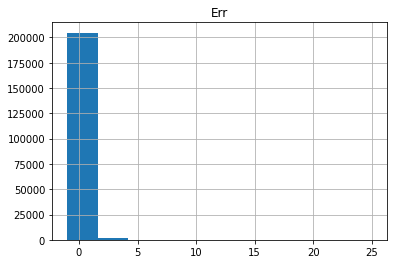

In [ ]:
import pandas as pd
#Merge two dataframes
result = X_test.copy()
result['Real'] = Y_test
result['Prediction'] =predictions_prob


#Estimar error
result['Err'] = result['Real'] - result['Prediction'] 

print(result)

histogram = result.hist(column ='Err')

In [ ]:
#Calcular el error en funcion de real
result.groupby(by=['Real']).mean()[['numAvailable','Prediction']]

,numAvailable,Prediction
Real,,
0.0,7.448299,0.280938
1.0,23.221903,0.789500
2.0,39.685586,0.928240
3.0,50.717775,0.924016
4.0,63.855932,0.805085
5.0,71.142857,0.693878
6.0,117.750000,0.812500
7.0,125.000000,0.888889
9.0,174.000000,0.000000


In [ ]:
 #Calcular el error en funcion de real
result.groupby(by=['Real']).count() #El problema viene de que hay toneladas de datos de 1 y no hay casi del resto 

,hour,clusterId,numAvailable,Prediction,Err
Real,,,,,
0.0,81381,81381,81381,81381,81381
1.0,117335,117335,117335,117335,117335
2.0,6466,6466,6466,6466,6466
3.0,737,737,737,737,737
4.0,118,118,118,118,118
5.0,49,49,49,49,49
6.0,16,16,16,16,16
7.0,9,9,9,9,9
9.0,1,1,1,1,1


# Train if is going to exist a movement or not

In [ ]:
pdThursdayNumTripsYesNo = pdThursdayNumTrips['numTrips'] >0

In [ ]:
pdThursdayNumTripsYesNo

2          False
3          False
14         False
15         False
63          True
           ...  
5541094     True
5541106    False
5541118    False
5541125     True
5541130     True
Name: numTrips, Length: 824455, dtype: bool

In [ ]:
#Brake the data between train and test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(pdThursdayInfo, pdThursdayNumTripsYesNo)

In [ ]:
#Train a tree
from sklearn import tree

classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train, Y_train)

#Predict
predictions = classifier.predict(X_test)

#Calculate metrics
from sklearn import metrics

predictions_prob = classifier.predict_proba(X_test)[:,1]
predictions_prob = predictions_prob.round(0)
print(predictions_prob)

#Generate dataframe
import pandas as pd
#Merge two dataframes
result = X_test.copy()
result['Real'] = Y_test
result['Prediction'] =predictions_prob


#Estimar error
result['Err'] = result['Real'] - result['Prediction'] 

print(result)

#Calculate error depending on class
result.groupby(by=['Real']).mean()[['numAvailable','Prediction']]

[1. 0. 1. ... 1. 0. 1.]
         hour  clusterId  numAvailable   Real  Prediction  Err
2728615   6.0       46.0            59   True         1.0  0.0
3202988   0.0       52.0             6  False         0.0  0.0
2078230  11.0       39.0            52   True         1.0  0.0
4197330   6.0       63.0             8   True         1.0  0.0
5486519  12.0       88.0             2  False         0.0  0.0
...       ...        ...           ...    ...         ...  ...
2127519  18.0       39.0           117   True         1.0  0.0
179912    2.0       18.0             1  False         0.0  0.0
5392029  11.0       86.0             7  False         1.0 -1.0
1752546   3.0       36.0             2   True         0.0  1.0
3111946  11.0       51.0            37   True         1.0  0.0

[206114 rows x 6 columns]


,numAvailable,Prediction
Real,,
False,7.472979,0.290986
True,24.286713,0.817921


In [ ]:
#Visualize the tree
#Takes too much time
#tree.plot_tree(classifier)
"""
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20))
tree.plot_tree(classifier,
              feature_names = X_train.columns.values,
              class_names = ['No', 'Sí'],
              filled = True,
              impurity = False,
              fontsize = 8)
plt.show()
"""

"\nimport matplotlib.pyplot as plt\n\nplt.figure(figsize = (20,20))\ntree.plot_tree(classifier,\n              feature_names = X_train.columns.values,\n              class_names = ['No', 'Sí'],\n              filled = True,\n              impurity = False,\n              fontsize = 8)\nplt.show()\n"

#Mix all the operators
Now i need more data for a specific time so i mix all the operators

In [ ]:

pdThursdayAgruped = pdThursdayClean[['tipoVehiculo', 'weekday', 'hour',
       'clusterId','numAvailable','numTrips']]

#Now can filter between coche/patinete/moto

pdThursdayAgrupedCar = pdThursdayAgruped[pdThursdayAgruped['tipoVehiculo'] == 'coche']
pdThursdayAgrupedScooter = pdThursdayAgruped[pdThursdayAgruped['tipoVehiculo'] == 'patinete']
pdThursdayAgrupedMoto = pdThursdayAgruped[pdThursdayAgruped['tipoVehiculo'] == 'moto']

print(pdThursdayAgrupedCar.size)
print(pdThursdayAgrupedScooter.size)
print(pdThursdayAgrupedMoto.size)

1871310
249252
2826168


Continue with moto becouse there are more data

In [ ]:
pdThursdayAgrupedMoto

,tipoVehiculo,weekday,hour,clusterId,numAvailable,numTrips
2,moto,Thursday,22.0,5.0,3,0.0
64,moto,Thursday,12.0,9.0,7,0.0
65,moto,Thursday,20.0,9.0,2,0.0
66,moto,Thursday,0.0,11.0,1,0.0
85,moto,Thursday,21.0,81.0,6,0.0
...,...,...,...,...,...,...
5541042,moto,Thursday,17.0,88.0,8,2.0
5541044,moto,Thursday,9.0,88.0,6,1.0
5541048,moto,Thursday,13.0,88.0,18,0.0
5541082,moto,Thursday,19.0,88.0,14,1.0


Now train the model only for availability and moto

In [ ]:


#Prepare the trainData and the result
pdThursdayAgrupedMotoNumTrips = pdThursdayAgrupedMoto[['numTrips']]
#pdThursdayAgrupedMotoInfo = pdThursdayAgrupedMoto[['year', 'month', 'day', 'hour', 'clusterId', 'clusterLatitude','clusterLongitude', 'numAvailable']]
pdThursdayAgrupedMotoInfo = pdThursdayAgrupedMoto[['hour', 'clusterId', 'numAvailable']]



#Brake the data between train and test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(pdThursdayAgrupedMotoInfo, pdThursdayAgrupedMotoNumTrips)

#Train a tree
from sklearn import tree

classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train, Y_train)

#Predict
predictions = classifier.predict(X_test)



In [ ]:
pdThursdayAgrupedMoto['numTrips'][0:50]

2       0.0
64      0.0
65      0.0
66      0.0
85      0.0
86      0.0
87      0.0
88      0.0
100     0.0
101     0.0
103     1.0
104     0.0
106     1.0
107     0.0
109     0.0
118     0.0
119     0.0
122     0.0
158     1.0
159     0.0
188     0.0
189     0.0
192     0.0
193     0.0
198     0.0
207     1.0
286     0.0
664     0.0
665     0.0
860     0.0
861     1.0
862     0.0
863     0.0
864     0.0
925     0.0
930     0.0
931     0.0
933     0.0
934     0.0
975     0.0
1029    0.0
1051    1.0
1052    1.0
1053    1.0
1054    0.0
1055    0.0
1073    0.0
1075    0.0
1076    0.0
1077    0.0
Name: numTrips, dtype: float64

In [ ]:
pdThursdayAgrupedMoto['numTrips'].mean()

0.755057024210875

         hour  clusterId  numAvailable  Real  Prediction  Err
3637814   4.0       56.0            17   1.0         1.0  0.0
2405129  16.0       44.0            36   1.0         1.0  0.0
1686016  21.0       36.0            61   1.0         1.0  0.0
4939738  21.0       77.0             4   0.0         0.0  0.0
4964608   8.0       78.0             9   0.0         0.0  0.0
...       ...        ...           ...   ...         ...  ...
2742108  20.0       46.0            67   2.0         1.0  1.0
4037924  15.0       62.0            58   1.0         1.0  0.0
1490891   5.0       32.0            12   1.0         1.0  0.0
245016   23.0        3.0             9   0.0         0.0  0.0
2295434  20.0       43.0            20   1.0         1.0  0.0

[117757 rows x 6 columns]


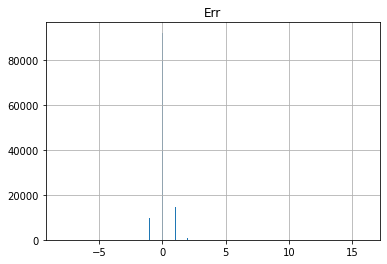

In [ ]:
#Analise the prediction
import pandas as pd
#Merge two dataframes
result = X_test.copy()
result['Real'] = Y_test
result['Prediction'] =predictions


#Estimar error
result['Err'] = result['Real'] - result['Prediction'] 

print(result)

histogram = result.hist(column ='Err', bins=400)

In [ ]:
#See the prediction
#Calcular el error en funcion de real
result.groupby(by=['Real']).mean()[['numAvailable','Prediction']]

,numAvailable,Prediction
Real,,
0.0,11.774325,0.265817
1.0,33.440848,0.879904
2.0,43.398767,0.971454
3.0,53.221884,0.978723
4.0,64.134454,0.915966
5.0,63.916667,0.888889
6.0,86.882353,0.823529
7.0,129.545455,1.363636
8.0,79.333333,4.000000


         hour  clusterId  numAvailable  Real  Prediction       Err  \
3637814   4.0       56.0            17   1.0    0.619870  0.380130   
2405129  16.0       44.0            36   1.0    0.843818  0.156182   
1686016  21.0       36.0            61   1.0    1.051076 -0.051076   
4939738  21.0       77.0             4   0.0    0.656379 -0.656379   
4964608   8.0       78.0             9   0.0    0.587926 -0.587926   
...       ...        ...           ...   ...         ...       ...   
2742108  20.0       46.0            67   2.0    1.078161  0.921839   
4037924  15.0       62.0            58   1.0    0.972565  0.027435   
1490891   5.0       32.0            12   1.0    0.605926  0.394074   
245016   23.0        3.0             9   0.0    0.739475 -0.739475   
2295434  20.0       43.0            20   1.0    0.769933  0.230067   

         ErrPorcentage  
3637814       0.022361  
2405129       0.004338  
1686016       0.000837  
4939738       0.164095  
4964608       0.065325  
...      

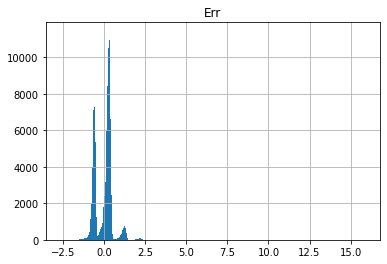

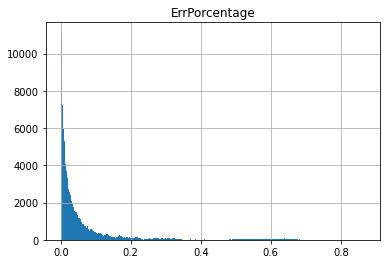

In [ ]:
#Now linear regresion
from sklearn.linear_model import LinearRegression 

classifier = LinearRegression()
classifier.fit(X_train, Y_train)

#Predict
predictions = classifier.predict(X_test)

#Analise the prediction
import pandas as pd
#Merge two dataframes
result = X_test.copy()
result['Real'] = Y_test
result['Prediction'] =predictions


#Estimar error
result['Err'] = result['Real'] - result['Prediction'] 
result['ErrPorcentage'] = abs(result['Real'] - result['Prediction']) / result['numAvailable'] 

print(result)

histogram = result.hist(column ='Err', bins=400)

histogram2 = result.hist(column ='ErrPorcentage', bins=400)

In [ ]:
result['Real']

3637814    1.0
2405129    1.0
1686016    1.0
4939738    0.0
4964608    0.0
          ... 
2742108    2.0
4037924    1.0
1490891    1.0
245016     0.0
2295434    1.0
Name: Real, Length: 117757, dtype: float64

In [ ]:
result.head(-20)

,hour,clusterId,numAvailable,Real,Prediction,Err,ErrPorcentage
3637814,4.0,56.0,17,1.0,0.619870,0.380130,0.022361
2405129,16.0,44.0,36,1.0,0.843818,0.156182,0.004338
1686016,21.0,36.0,61,1.0,1.051076,-0.051076,0.000837
4939738,21.0,77.0,4,0.0,0.656379,-0.656379,0.164095
4964608,8.0,78.0,9,0.0,0.587926,-0.587926,0.065325
...,...,...,...,...,...,...,...
1643231,20.0,35.0,7,1.0,0.688034,0.311966,0.044567
3440784,15.0,54.0,13,1.0,0.679853,0.320147,0.024627
3647779,9.0,57.0,2,1.0,0.559401,0.440599,0.220299
4708312,2.0,72.0,9,0.0,0.544153,-0.544153,0.060461


In [ ]:
#Calcular el error en funcion de real
result.groupby(by=['Real']).mean()[['numAvailable','Prediction']]

,numAvailable,Prediction
Real,,
0.0,11.774325,0.644604
1.0,33.440848,0.799267
2.0,43.398767,0.865984
3.0,53.221884,0.928974
4.0,64.134454,0.991257
5.0,63.916667,0.997390
6.0,86.882353,1.109976
7.0,129.545455,1.449562
8.0,79.333333,1.134497


Score
0.12364233719744155
         hour  clusterId  numAvailable  Real  Prediction       Err  \
3637814   4.0       56.0            17   1.0    0.619870  0.380130   
2405129  16.0       44.0            36   1.0    0.843818  0.156182   
1686016  21.0       36.0            61   1.0    1.051076 -0.051076   
4939738  21.0       77.0             4   0.0    0.656379 -0.656379   
4964608   8.0       78.0             9   0.0    0.587926 -0.587926   
...       ...        ...           ...   ...         ...       ...   
2742108  20.0       46.0            67   2.0    1.078161  0.921839   
4037924  15.0       62.0            58   1.0    0.972565  0.027435   
1490891   5.0       32.0            12   1.0    0.605926  0.394074   
245016   23.0        3.0             9   0.0    0.739475 -0.739475   
2295434  20.0       43.0            20   1.0    0.769933  0.230067   

         ErrPorcentage  
3637814       0.022361  
2405129       0.004338  
1686016       0.000837  
4939738       0.164095  
4964608 

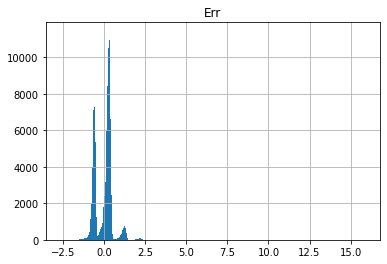

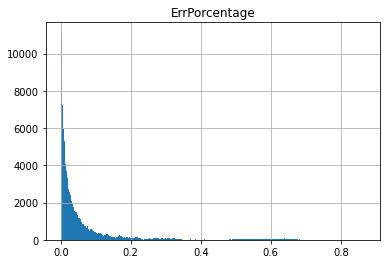

In [ ]:
#Ridge Regression
from sklearn.linear_model import Ridge
import numpy as np

rdg = Ridge(alpha = 0.5)

rdg.fit(X_train, Y_train)
print('Score')
print(rdg.score(X_test,Y_test))

#Predict
predictions = classifier.predict(X_test)


#Analise the prediction

#Merge two dataframes
result = X_test.copy()
result['Real'] = Y_test
result['Prediction'] =predictions


#Estimar error
result['Err'] = result['Real'] - result['Prediction'] 
result['ErrPorcentage'] = abs(result['Real'] - result['Prediction']) / result['numAvailable'] 

print(result)

histogram = result.hist(column ='Err', bins=400)

histogram2 = result.hist(column ='ErrPorcentage', bins=400)


In [ ]:
#Calcular el error en funcion de real
result.groupby(by=['Real']).mean()[['numAvailable','Prediction']]

,numAvailable,Prediction
Real,,
0.0,11.774325,0.644604
1.0,33.440848,0.799267
2.0,43.398767,0.865984
3.0,53.221884,0.928974
4.0,64.134454,0.991257
5.0,63.916667,0.997390
6.0,86.882353,1.109976
7.0,129.545455,1.449562
8.0,79.333333,1.134497


In [ ]:
 #Calcular el error en funcion de real
result.groupby(by=['Real']).count() #El problema viene de que hay toneladas de datos de 0,1 y no hay casi del resto 

,hour,clusterId,numAvailable,Prediction,Err,ErrPorcentage
Real,,,,,,
0.0,36495,36495,36495,36495,36495,36495
1.0,74740,74740,74740,74740,74740,74740
2.0,5675,5675,5675,5675,5675,5675
3.0,658,658,658,658,658,658
4.0,119,119,119,119,119,119
5.0,36,36,36,36,36,36
6.0,17,17,17,17,17,17
7.0,11,11,11,11,11,11
8.0,3,3,3,3,3,3


# Now try with Ensamble Regressors

In [ ]:
# evaluate bagging ensemble for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import BaggingRegressor
# define the model
model = BaggingRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, Y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -0.304 (0.002)


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


         hour  clusterId  numAvailable  Real  Prediction       Err  \
3637814   4.0       56.0            17   1.0    0.816504  0.183496   
2405129  16.0       44.0            36   1.0    1.139749 -0.139749   
1686016  21.0       36.0            61   1.0    1.000000  0.000000   
4939738  21.0       77.0             4   0.0    0.000000  0.000000   
4964608   8.0       78.0             9   0.0    0.000000  0.000000   
...       ...        ...           ...   ...         ...       ...   
2742108  20.0       46.0            67   2.0    1.069359  0.930641   
4037924  15.0       62.0            58   1.0    1.182619 -0.182619   
1490891   5.0       32.0            12   1.0    0.888425  0.111575   
245016   23.0        3.0             9   0.0    0.000000  0.000000   
2295434  20.0       43.0            20   1.0    0.855000  0.145000   

         ErrPorcentage  
3637814       0.010794  
2405129       0.003882  
1686016       0.000000  
4939738       0.000000  
4964608       0.000000  
...      

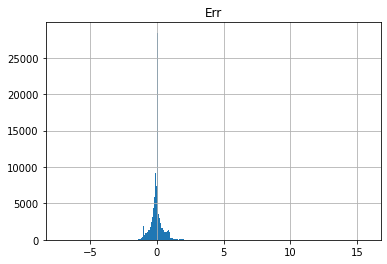

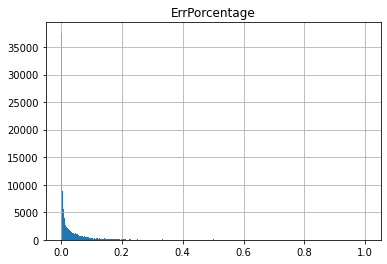

In [ ]:

# fit the model on the whole dataset
model.fit(X_train, Y_train)

#Evaluate the prediction
#Predict
predictions = model.predict(X_test)


#Analise the prediction

#Merge two dataframes
result = X_test.copy()
result['Real'] = Y_test
result['Prediction'] =predictions


#Estimar error
result['Err'] = result['Real'] - result['Prediction'] 
result['ErrPorcentage'] = abs(result['Real'] - result['Prediction']) / result['numAvailable'] 

print(result)

histogram = result.hist(column ='Err', bins=400)

histogram2 = result.hist(column ='ErrPorcentage', bins=400)


In [ ]:
#Calcular el error en funcion de real
result.groupby(by=['Real']).mean()[['numAvailable','Prediction']]

,numAvailable,Prediction
Real,,
0.0,11.774325,0.348501
1.0,33.440848,0.936999
2.0,43.398767,1.069245
3.0,53.221884,1.118438
4.0,64.134454,1.160199
5.0,63.916667,1.249095
6.0,86.882353,1.169469
7.0,129.545455,1.405361
8.0,79.333333,3.366667


In [ ]:
#Merge two dataframes
result = X_test.copy()
result['Real'] = Y_test
result['Prediction'] =predictions.round(0)


#Estimar error
result['Err'] = result['Real'] - result['Prediction'] 
result['ErrPorcentage'] = abs(result['Real'] - result['Prediction']) / result['numAvailable'] 

print(result)

#Calcular el error en funcion de real
result.groupby(by=['Real']).mean()[['numAvailable','Prediction']]


         hour  clusterId  numAvailable  Real  Prediction  Err  ErrPorcentage
3637814   4.0       56.0            17   1.0         1.0  0.0       0.000000
2405129  16.0       44.0            36   1.0         1.0  0.0       0.000000
1686016  21.0       36.0            61   1.0         1.0  0.0       0.000000
4939738  21.0       77.0             4   0.0         0.0  0.0       0.000000
4964608   8.0       78.0             9   0.0         0.0  0.0       0.000000
...       ...        ...           ...   ...         ...  ...            ...
2742108  20.0       46.0            67   2.0         1.0  1.0       0.014925
4037924  15.0       62.0            58   1.0         1.0  0.0       0.000000
1490891   5.0       32.0            12   1.0         1.0  0.0       0.000000
245016   23.0        3.0             9   0.0         0.0  0.0       0.000000
2295434  20.0       43.0            20   1.0         1.0  0.0       0.000000

[117757 rows x 7 columns]


,numAvailable,Prediction
Real,,
0.0,11.774325,0.301603
1.0,33.440848,0.915132
2.0,43.398767,1.012159
3.0,53.221884,1.044073
4.0,64.134454,1.100840
5.0,63.916667,1.222222
6.0,86.882353,1.176471
7.0,129.545455,1.363636
8.0,79.333333,3.333333


# The same but now only if exist movement or not

In [ ]:
pdThursdayNumTripsYesNo = pdThursdayNumTrips['numTrips'] >0

In [ ]:
pdThursdayNumTripsYesNo

2          False
3          False
14         False
15         False
63          True
           ...  
5541094     True
5541106    False
5541118    False
5541125     True
5541130     True
Name: numTrips, Length: 824455, dtype: bool

In [ ]:
#Brake the data between train and test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(pdThursdayInfo, pdThursdayNumTripsYesNo)

In [ ]:
# evaluate bagging ensemble for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import BaggingRegressor
# define the model
model = BaggingRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, Y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -0.284 (0.001)


         hour  clusterId  numAvailable   Real  Prediction       Err  \
3674660   1.0       57.0             3  False    0.103024 -0.103024   
4092864  11.0       62.0            10   True    0.880668  0.119332   
3610795  16.0       56.0            14   True    0.917298  0.082702   
3744909  16.0       59.0            18   True    0.843333  0.156667   
3851650  22.0       60.0            10  False    0.200353 -0.200353   
...       ...        ...           ...    ...         ...       ...   
225605   16.0       16.0             1   True    0.213754  0.786246   
5312375   4.0       84.0            15   True    0.753124  0.246876   
519455   19.0       15.0             5   True    0.276578  0.723422   
3851338  11.0       60.0            28   True    1.000000  0.000000   
5482755   6.0       87.0             2  False    0.351193 -0.351193   

         ErrPorcentage  
3674660       0.034341  
4092864       0.011933  
3610795       0.005907  
3744909       0.008704  
3851650       0.020035

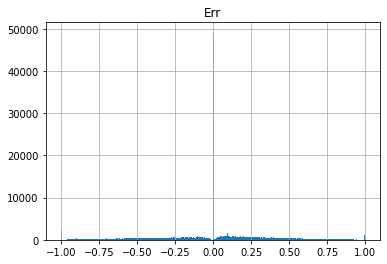

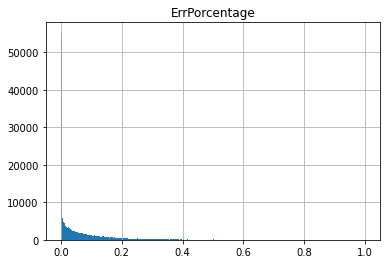

In [ ]:

# fit the model on the whole dataset
model.fit(X_train, Y_train)

#Evaluate the prediction
#Predict
predictions = model.predict(X_test)


#Analise the prediction

#Merge two dataframes
result = X_test.copy()
result['Real'] = Y_test
result['Prediction'] =predictions


#Estimar error
result['Err'] = result['Real'] - result['Prediction'] 
result['ErrPorcentage'] = abs(result['Real'] - result['Prediction']) / result['numAvailable'] 

print(result)

histogram = result.hist(column ='Err', bins=400)

histogram2 = result.hist(column ='ErrPorcentage', bins=400)


In [ ]:
#Merge two dataframes
result = X_test.copy()
result['Real'] = Y_test
result['Prediction'] =predictions.round(0)


#Estimar error
result['Err'] = result['Real'] - result['Prediction'] 
result['ErrPorcentage'] = abs(result['Real'] - result['Prediction']) / result['numAvailable'] 

print(result)

#Calcular el error en funcion de real
result.groupby(by=['Real']).mean()[['numAvailable','Prediction']]


         hour  clusterId  numAvailable   Real  Prediction  Err  ErrPorcentage
3674660   1.0       57.0             3  False         0.0  0.0            0.0
4092864  11.0       62.0            10   True         1.0  0.0            0.0
3610795  16.0       56.0            14   True         1.0  0.0            0.0
3744909  16.0       59.0            18   True         1.0  0.0            0.0
3851650  22.0       60.0            10  False         0.0  0.0            0.0
...       ...        ...           ...    ...         ...  ...            ...
225605   16.0       16.0             1   True         0.0  1.0            1.0
5312375   4.0       84.0            15   True         1.0  0.0            0.0
519455   19.0       15.0             5   True         0.0  1.0            0.2
3851338  11.0       60.0            28   True         1.0  0.0            0.0
5482755   6.0       87.0             2  False         0.0  0.0            0.0

[206114 rows x 7 columns]


,numAvailable,Prediction
Real,,
False,7.392155,0.303399
True,24.359702,0.827351


# Lo mismo sin numAvailable

In [ ]:
pdThursdayNumTripsYesNo = pdThursdayNumTrips['numTrips'] >0

In [ ]:
pdThursdayNumTripsYesNo

2          False
3          False
14         False
15         False
63          True
           ...  
5541094     True
5541106    False
5541118    False
5541125     True
5541130     True
Name: numTrips, Length: 824455, dtype: bool

In [ ]:
pdThursdayInfo

,hour,clusterId,numAvailable
2,22.0,5.0,3
3,22.0,81.0,2
14,11.0,4.0,2
15,3.0,5.0,1
63,12.0,2.0,1
...,...,...,...
5541094,16.0,88.0,7
5541106,5.0,88.0,1
5541118,22.0,88.0,16
5541125,3.0,88.0,9


In [ ]:
pdThursdayInfoWithoutNumAvailable = pdThursdayInfo[['hour','clusterId']]
pdThursdayInfoWithoutNumAvailable

,hour,clusterId
2,22.0,5.0
3,22.0,81.0
14,11.0,4.0
15,3.0,5.0
63,12.0,2.0
...,...,...
5541094,16.0,88.0
5541106,5.0,88.0
5541118,22.0,88.0
5541125,3.0,88.0


In [ ]:
#Brake the data between train and test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(pdThursdayInfoWithoutNumAvailable, pdThursdayNumTripsYesNo)

In [ ]:
# evaluate bagging ensemble for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import BaggingRegressor
# define the model
model = BaggingRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, Y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -0.334 (0.001)


         hour  clusterId   Real  Prediction       Err
238256    8.0        3.0  False    0.358242 -0.358242
443192   22.0       14.0  False    0.085078 -0.085078
2574059   9.0       45.0   True    0.878887  0.121113
1502677   7.0       32.0  False    0.488097 -0.488097
1638432   4.0       35.0  False    0.473104 -0.473104
...       ...        ...    ...         ...       ...
49568    18.0        2.0  False    0.207964 -0.207964
3959724   7.0       61.0  False    0.833479 -0.833479
2548456  14.0       45.0   True    0.909295  0.090705
937168    9.0       24.0  False    0.445283 -0.445283
3874251  20.0       60.0   True    0.539555  0.460445

[206114 rows x 5 columns]


KeyError: ignored

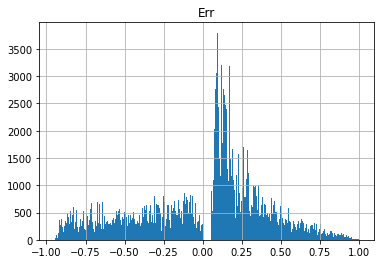

In [ ]:

# fit the model on the whole dataset
model.fit(X_train, Y_train)

#Evaluate the prediction
#Predict
predictions = model.predict(X_test)


#Analise the prediction

#Merge two dataframes
result = X_test.copy()
result['Real'] = Y_test
result['Prediction'] =predictions


#Estimar error
result['Err'] = result['Real'] - result['Prediction'] 

print(result)

histogram = result.hist(column ='Err', bins=400)

histogram2 = result.hist(column ='ErrPorcentage', bins=400)


In [ ]:
#Merge two dataframes
result = X_test.copy()
result['Real'] = Y_test
result['Prediction'] =predictions.round(0)


#Estimar error
result['Err'] = result['Real'] - result['Prediction'] 

print(result)

#Calcular el error en funcion de real
result.groupby(by=['Real']).mean()[['Prediction']]


Revisar calidad de los datos